In [1]:
import pandas as pd

C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df_eth = pd.read_csv(r"C:\Users\User\Documents\C2001\FIT3161_3162\FIT3161\dataset\time_series\coin_Ethereum.csv") 
# df_eth.columns = df_eth.iloc[0]
# df_eth.drop(df_eth.index[[0, 1]], inplace=True)
df_eth.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [3]:
df_eth.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [4]:
# convert date format to datetime
# df_eth['Date'] = pd.to_datetime(df_eth['Date'], format='%Y-%m-%d %H-%p').dt.strftime('%Y-%m-%d %H:%M')
df_eth['Date'] = pd.to_datetime(df_eth['Date'])
# sort values by date
df_eth = df_eth.sort_values(by='Date')
df_eth.rename(columns = {'Date':'datetime'}, inplace = True)
del df_eth['Symbol']
# del df_eth['Unix Timestamp']

In [5]:
df_eth.isnull().sum()

SNo          0
Name         0
datetime     0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

In [6]:
df_eth.head()

,SNo,Name,datetime,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [7]:
del df_eth['SNo']
del df_eth['Name']

In [8]:
# Convert all quantitative variables to numeric format
df_ethusd = pd.concat([
    df_eth.iloc[:,0],
    df_eth.iloc[:, 1:len(df_eth.columns)].astype('float')
], axis = 1)
df_eth.dtypes

datetime     datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [9]:
# Select features (columns) to be involved intro training and predictions
cols = list(['Close','High', 'Low', 'Open'])
# Target feature
y_target = 'Close'
# Number of time steps use to predict the future 
n_time_steps = 24
# Extract dates (will be used in visualization)
dataset_datelist = list(df_eth['datetime'])
# Parse training set timestamp for better visualization
df_eth = pd.DataFrame(df_eth, columns=cols)
df_eth.index = dataset_datelist
df_eth.index = pd.to_datetime(df_eth.index)
print('Training set shape == {}'.format(df_eth.shape))
print('All timestamps == {}'.format(len(dataset_datelist)))
print('Featured selected: {}'.format(cols))
print('Featured target selected: {}'.format(y_target))
print('Number of time steps selected: {}'.format(n_time_steps))

Training set shape == (2160, 4)
All timestamps == 2160
Featured selected: ['Close', 'High', 'Low', 'Open']
Featured target selected: Close
Number of time steps selected: 24


In [10]:
import math
train_split = 0.8
Data = df_eth.values #converting numpy array
train_data_size = math.ceil(len(Data)*train_split)
test_data_size = len(df_eth) - train_data_size
print('train size == {}.'.format(train_data_size))
print('test size == {}.'.format(test_data_size))
# split the actual dataframe in train/test set
train, test = df_eth[0:train_data_size], df_eth[train_data_size:len(df_eth)]
print('train shape == {}.'.format(train.shape))
print('test shape == {}.'.format(test.shape))

train size == 1728.
test size == 432.
train shape == (1728, 4).
test shape == (432, 4).


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_scaled_data = scaler.fit_transform(train)
print('training scaled data shape == {}.'.format(training_scaled_data.shape))
look_back_train_data = train.tail(n_time_steps) #look back n_time_steps
testing_data = look_back_train_data.append(test)
scaler_test = StandardScaler()
testing_scaled_data = scaler_test.fit_transform(testing_data)
scaler_test_predict = StandardScaler()
scaler_test_predict.fit_transform(testing_data.iloc[:, 0:1])
print('testing scaled data shape == {}.'.format(testing_scaled_data.shape))

training scaled data shape == (1728, 4).
testing scaled data shape == (456, 4).


In [20]:
def split_sequences_multivariate_output(sequences, n_steps):
  import numpy as np
  X, y = list(), list()
  for i in range(len(sequences)):
      # find the end of this pattern
      end_ix = i + n_steps
      # check if we are beyond the dataset
      if end_ix > len(sequences)-1:
          break
      # gather input and output parts of the pattern
      seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

# convert into input/output
X_train, y_train = split_sequences_multivariate_output(training_scaled_data, n_time_steps)
X_test, y_test = split_sequences_multivariate_output(testing_scaled_data, n_time_steps)
print('X_train shape == {}.'.format(X_train.shape))
print('y_train shape == {}.'.format(y_train.shape))
print('X_test shape == {}.'.format(X_test.shape))
print('y_test shape == {}.'.format(y_test.shape))

X_train shape == (1704, 24, 4).
y_train shape == (1704, 4).
X_test shape == (432, 24, 4).
y_test shape == (432, 4).


In [21]:
def train_keras_model(X_train, y_train, X_test, y_test, epochs, batch_size, shuffle=False):
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import LSTM, Dropout, Dense
# Initializing the Neural Network based on LSTM
  model = Sequential()  
  model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(Dropout(0.25))
  model.add(LSTM(units=50))
  model.add(Dropout(0.25))
  model.add(Dense(units=X_train.shape[2], activation='linear'))
  model.compile(optimizer='adam',loss='mean_squared_error')
  
  history = model.fit(X_train, y_train, shuffle=shuffle, validation_data=(X_test, y_test), epochs=epochs, verbose=2, batch_size=batch_size).history
  
  return history, model

In [22]:
# Fit model
history, model = train_keras_model(X_train, y_train, X_test, y_test, epochs=30, batch_size=256, shuffle=False)

Epoch 1/30
7/7 - 3s - loss: 0.7814 - val_loss: 0.4307
Epoch 2/30
7/7 - 0s - loss: 0.4769 - val_loss: 0.2370
Epoch 3/30
7/7 - 0s - loss: 0.3463 - val_loss: 0.1511
Epoch 4/30
7/7 - 0s - loss: 0.2693 - val_loss: 0.0990
Epoch 5/30
7/7 - 0s - loss: 0.2070 - val_loss: 0.0809
Epoch 6/30
7/7 - 0s - loss: 0.1763 - val_loss: 0.0729
Epoch 7/30
7/7 - 0s - loss: 0.1410 - val_loss: 0.0644
Epoch 8/30
7/7 - 0s - loss: 0.1199 - val_loss: 0.0582
Epoch 9/30
7/7 - 0s - loss: 0.1103 - val_loss: 0.0552
Epoch 10/30
7/7 - 0s - loss: 0.0954 - val_loss: 0.0540
Epoch 11/30
7/7 - 0s - loss: 0.0826 - val_loss: 0.0535
Epoch 12/30
7/7 - 0s - loss: 0.0758 - val_loss: 0.0540
Epoch 13/30
7/7 - 0s - loss: 0.0796 - val_loss: 0.0599
Epoch 14/30
7/7 - 0s - loss: 0.0882 - val_loss: 0.0531
Epoch 15/30
7/7 - 0s - loss: 0.0946 - val_loss: 0.0441
Epoch 16/30
7/7 - 0s - loss: 0.0716 - val_loss: 0.0489
Epoch 17/30
7/7 - 0s - loss: 0.0707 - val_loss: 0.0432
Epoch 18/30
7/7 - 0s - loss: 0.0614 - val_loss: 0.0450
Epoch 19/30
7/7 - 0

In [23]:
import numpy as np 

# Perform predictions
predictions_test = model.predict(X_test)
# Inverse the predictions to original measurements
y_pred_test = scaler_test_predict.inverse_transform(np.array(predictions_test)[:,0])
y_actual_test = scaler_test_predict.inverse_transform(np.array(y_test)[:,0])

In [24]:
y_test_serie = pd.DataFrame(y_actual_test, columns=[y_target]).set_index(testing_data[n_time_steps:].index)
y_pred_serie = pd.DataFrame(y_pred_test, columns=[y_target]).set_index(testing_data[n_time_steps:].index)

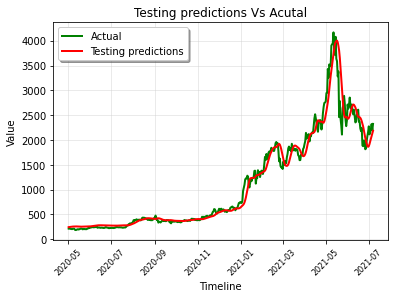

In [26]:
import matplotlib.pyplot as plt

plt.plot(y_test_serie.index, y_test_serie[y_target], color='green', linewidth=2, label='Actual')
plt.plot(y_pred_serie.index, y_pred_serie[y_target], color='red', linewidth=2, label='Testing predictions')
plt.grid(which='major', color='#cccccc', alpha=0.5)
plt.legend(shadow=True)
plt.title('Testing predictions Vs Acutal')
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()